In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

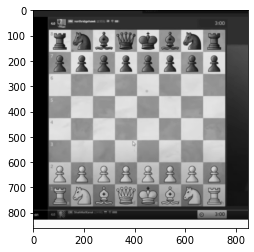

In [12]:
img = cv2.imread("images/chess.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = "gray")

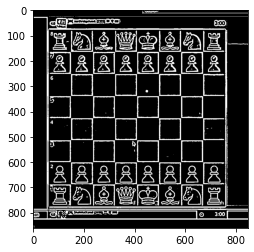

In [13]:
gray = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
plt.imshow(thresh, cmap = "gray")

In [14]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
biggest = None
max_area = 0
for i in contours:
        area = cv2.contourArea(i)
        if area > 500:
                peri = cv2.arcLength(i,True)
                approx = cv2.approxPolyDP(i,0.02*peri,True)
                if area > max_area and len(approx)==4:
                        biggest = approx
                        max_area = area

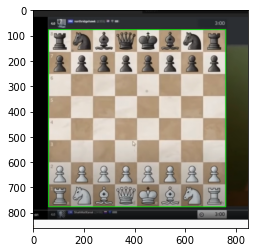

In [16]:
x,y,w,h = cv2.boundingRect(biggest)
plt.imshow(cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2))

In [19]:
right_one = biggest

array([[[ 62,  77]],

       [[759,  78]],

       [[757, 775]],

       [[ 61, 774]]], dtype=int32)

In [47]:
np.shape(gray)

(860, 848)

In [77]:
board_img = gray[60:770][60:790]

In [74]:
np.shape(board_img)

(590, 848)

In [78]:
cv2.imshow('Output', board_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

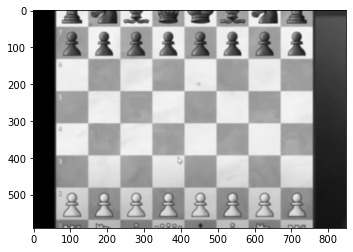

In [75]:
plt.imshow(board_img, cmap="gray")

In [89]:
np.shape(warp)

(512, 512)

In [90]:
approx

array([[ 62.,  77.],
       [759.,  78.],
       [757., 775.],
       [ 61., 774.]], dtype=float32)

In [79]:
def rectify(h):
        h = h.reshape((4,2))
        hnew = np.zeros((4,2),dtype = np.float32)

        add = h.sum(1)
        hnew[0] = h[np.argmin(add)]
        hnew[2] = h[np.argmax(add)]
        
        diff = np.diff(h,axis = 1)
        hnew[1] = h[np.argmin(diff)]
        hnew[3] = h[np.argmax(diff)]
 
        return hnew


In [80]:
approx=rectify(right_one)

In [91]:
h = np.array([ [0,0],[255,0],[255,255],[0,255] ],np.float32)

In [92]:
retval = cv2.getPerspectiveTransform(approx,h)
warp = cv2.warpPerspective(gray,retval,(256,256))

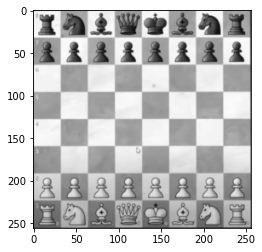

In [93]:
plt.imshow(warp, cmap="gray")

In [107]:
cropped = warp[0:32, 0:32]
cv2.imshow("cropped", cropped)
cv2.waitKey(0)

-1

In [104]:
np.shape(cropped)

(32, 32)

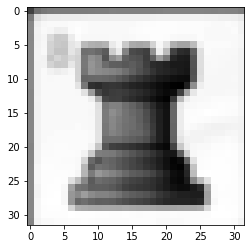

In [97]:
plt.imshow(cropped, cmap="gray")

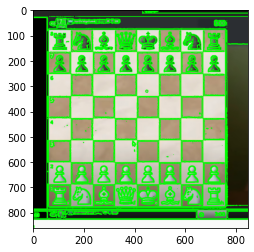

In [96]:
plt.imshow(cv2.drawContours(img, contours, -1, (0, 255, 0), 2))